# Amazon Sentiment Analysis

## Business Objective -
- Extracting Sentiment From Customer Reviews on a Product

### Attribute Information:

- Id
- ProductId - unique identifier for the product
- UserId - unqiue identifier for the user
- ProfileName
- HelpfulnessNumerator - number of users who found the review helpful
- Rating - rating between 1 and 5
- Date - Date on which the review posted
- Title - brief summary of the review
- Text - text of the review

In [1]:
!pip install nltk
!pip install re 
!pip install wordcloud
!pip install textblob
!pip install Wordcloud
!pip install cufflinks
!pip install plotly
!pipp install collections
!pip install textblob

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


'pipp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode , iplot
init_notebook_mode(connected= True)
cf.go_offline();
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Amazon_Product_Reviews.csv")
df.head()

,Unnamed: 0,date,title,rating,body,model
0,0,4 May 2019,"Platina on, Garmi gone! Efficient cooler for n...",4.0,Summer and air cooler goes synonymously. As te...,Old Model
1,1,6 March 2023,Noise level,4.0,"Overall product is great , at this price you c...",New Model
2,2,22 March 2023,Superb,4.0,Very good product ☺️ superrrr,New Model
3,3,22 March 2023,OK,4.0,this product is good it is bajaj one.,New Model
4,4,19 March 2023,"Im okey with this, never loose your Money",4.0,The media could not be loaded.\n ...,New Model


In [4]:
df.tail()

,Unnamed: 0,date,title,rating,body,model
4995,4995,13 May 2019,Want to replace,1.0,It smells badly.want to replace,Old Model
4996,4996,24 July 2019,Not Completely,1.0,Water💧 capacity low,Old Model
4997,4997,17 June 2019,Dont buy this cooler,1.0,Dont buy this product..,Old Model
4998,4998,26 March 2019,Waste of money,1.0,It is best very small room,Old Model
4999,4999,31 October 2018,Bad quality product,1.0,Bad quality product with the high price,Old Model


### Removing Unnecessary Columns

In [5]:
# removing the columns that are not needed
df = df.drop('Unnamed: 0', axis=1)
df

,date,title,rating,body,model
0,4 May 2019,"Platina on, Garmi gone! Efficient cooler for n...",4.0,Summer and air cooler goes synonymously. As te...,Old Model
1,6 March 2023,Noise level,4.0,"Overall product is great , at this price you c...",New Model
2,22 March 2023,Superb,4.0,Very good product ☺️ superrrr,New Model
3,22 March 2023,OK,4.0,this product is good it is bajaj one.,New Model
4,19 March 2023,"Im okey with this, never loose your Money",4.0,The media could not be loaded.\n ...,New Model
...,...,...,...,...,...
4995,13 May 2019,Want to replace,1.0,It smells badly.want to replace,Old Model
4996,24 July 2019,Not Completely,1.0,Water💧 capacity low,Old Model
4997,17 June 2019,Dont buy this cooler,1.0,Dont buy this product..,Old Model
4998,26 March 2019,Waste of money,1.0,It is best very small room,Old Model


## Descriptive Statistics

In [6]:
df.shape

(5000, 5)

In [7]:
df.columns

Index(['date', 'title', 'rating', 'body', 'model'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5000 non-null   object 
 1   title   4999 non-null   object 
 2   rating  5000 non-null   float64
 3   body    4935 non-null   object 
 4   model   5000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 195.4+ KB


In [9]:
df.describe()

,rating
count,5000.000000
mean,3.204000
std,1.587226
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
df.isnull().sum()

date       0
title      1
rating     0
body      65
model      0
dtype: int64

In [11]:
df.isna().sum()

date       0
title      1
rating     0
body      65
model      0
dtype: int64

In [12]:
df1 = df.dropna()
df1

,date,title,rating,body,model
0,4 May 2019,"Platina on, Garmi gone! Efficient cooler for n...",4.0,Summer and air cooler goes synonymously. As te...,Old Model
1,6 March 2023,Noise level,4.0,"Overall product is great , at this price you c...",New Model
2,22 March 2023,Superb,4.0,Very good product ☺️ superrrr,New Model
3,22 March 2023,OK,4.0,this product is good it is bajaj one.,New Model
4,19 March 2023,"Im okey with this, never loose your Money",4.0,The media could not be loaded.\n ...,New Model
...,...,...,...,...,...
4995,13 May 2019,Want to replace,1.0,It smells badly.want to replace,Old Model
4996,24 July 2019,Not Completely,1.0,Water💧 capacity low,Old Model
4997,17 June 2019,Dont buy this cooler,1.0,Dont buy this product..,Old Model
4998,26 March 2019,Waste of money,1.0,It is best very small room,Old Model


## EDA

In [13]:
# EDA related imports
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from os.path import join

<Axes: title={'center': 'rating'}>

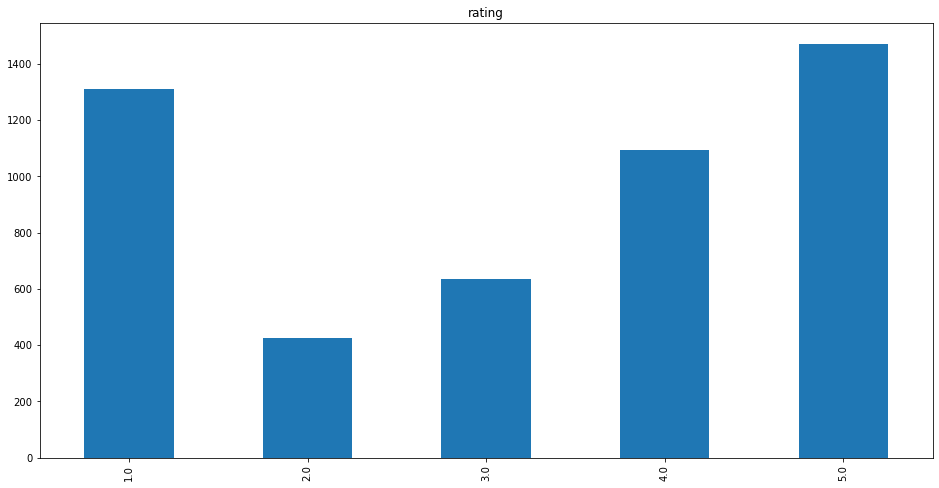

In [14]:
plt.figure(figsize=(16,8))
df1['rating'].value_counts().sort_index().plot(kind = 'bar', title = 'rating')

Text(0.5, 1.0, 'boxplot of ratings')

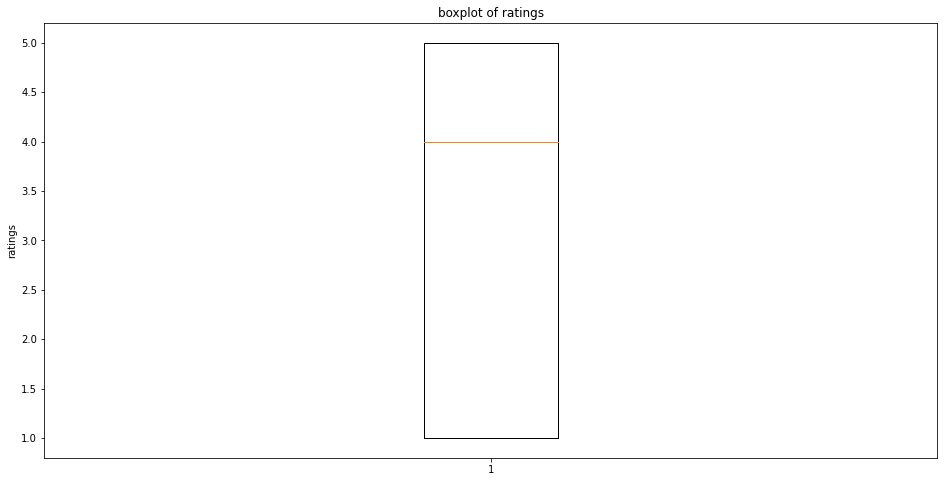

In [15]:
plt.figure(figsize=(16,8))
#boxplot
plt.boxplot(df1['rating'])
plt.ylabel('ratings')
plt.title('boxplot of ratings')

### Sentiment Polarity - Rating Analysis
First we attempt to find whether or not any relationship exists between the sentiment polarity of a review and the rating. We do so by observing how to average sentiment of reviews changes with rating

In [17]:
# Load the downsampled preprocessed data
data = df1[["rating", "body"]]
data["body"] = data["body"].apply(str)
display(data)

,rating,body
0,4.0,Summer and air cooler goes synonymously. As te...
1,4.0,"Overall product is great , at this price you c..."
2,4.0,Very good product ☺️ superrrr
3,4.0,this product is good it is bajaj one.
4,4.0,The media could not be loaded.\n ...
...,...,...
4995,1.0,It smells badly.want to replace
4996,1.0,Water💧 capacity low
4997,1.0,Dont buy this product..
4998,1.0,It is best very small room


In [18]:
# Define function to extract a string's sentiment
find_sentiment = lambda body: TextBlob(body).sentiment.polarity

# Create new column in dataframe
data["sentiment"] = data["body"].apply(find_sentiment)

In [19]:
data

,rating,body,sentiment
0,4.0,Summer and air cooler goes synonymously. As te...,0.137445
1,4.0,"Overall product is great , at this price you c...",0.072348
2,4.0,Very good product ☺️ superrrr,0.910000
3,4.0,this product is good it is bajaj one.,0.700000
4,4.0,The media could not be loaded.\n ...,0.246071
...,...,...,...
4995,1.0,It smells badly.want to replace,0.000000
4996,1.0,Water💧 capacity low,0.000000
4997,1.0,Dont buy this product..,0.000000
4998,1.0,It is best very small room,0.337500


Mean Sentiment for Rating 1: -0.15462522041984958
Mean Sentiment for Rating 2: -0.03450464381552637
Mean Sentiment for Rating 3: 0.11315531238425423
Mean Sentiment for Rating 4: 0.3579377333185306
Mean Sentiment for Rating 5: 0.46222639344765437


<Axes: xlabel='rating'>

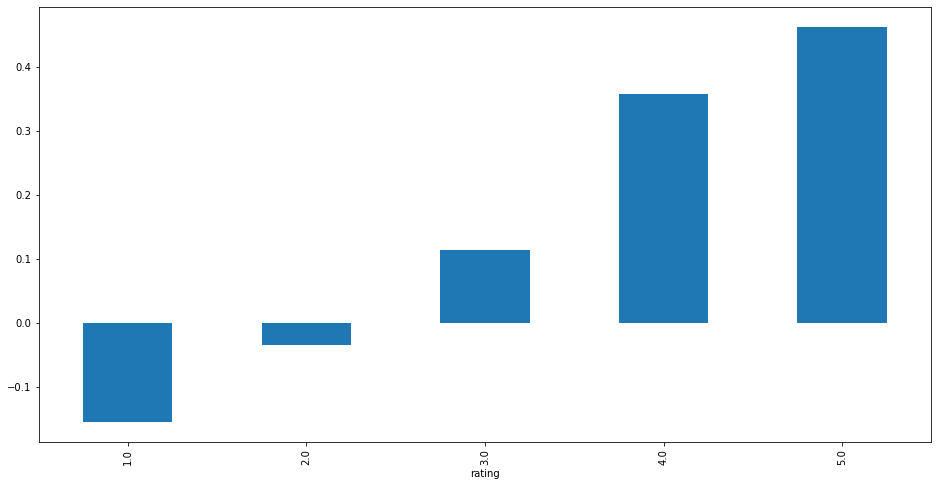

In [20]:
plt.figure(figsize=(16,8))

# Plot mean sentiment against rating 
for rating in range(1,6):
    print(f"Mean Sentiment for Rating {rating}: {data[data['rating'] == rating]['sentiment'].mean()}")

data.groupby("rating")["sentiment"].mean().plot(kind="bar")

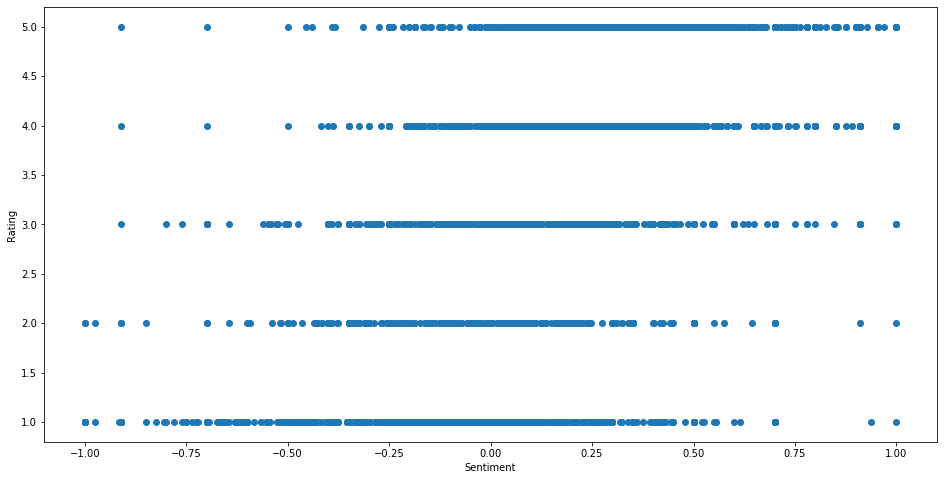

In [21]:
plt.figure(figsize=(16,8))

plt.scatter(data["sentiment"], data["rating"])
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

As we can see from the above plot, though we see a positive correlation with the mean sentiment of the reviews, when looking at the data at an individual level, we see that there is a lot of variance and overlap between the sentiment values of reviews of different ratings. We can investigate further by seeing what the most common words that contirbute to this sentiment are.

### Year Wise Review Count

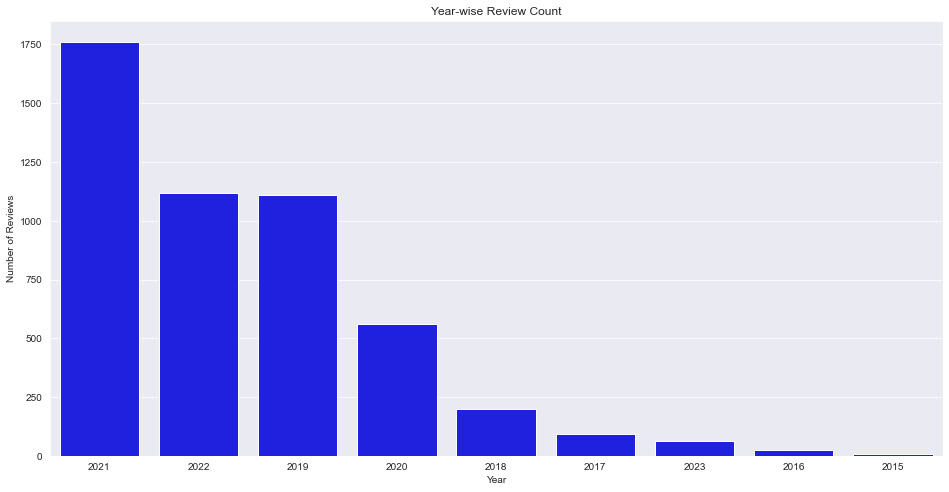

In [22]:
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(16,8))

# extract year from date column
df1['Year'] = df1['date'].apply(lambda x: str(x).split()[-1])

# count reviews for each year
yearly_review_count = df1['Year'].value_counts()

# plot the bar chart
sns.barplot(x=yearly_review_count.index, y=yearly_review_count.values, color='blue')
plt.title('Year-wise Review Count')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


### Year Wise Rating Count

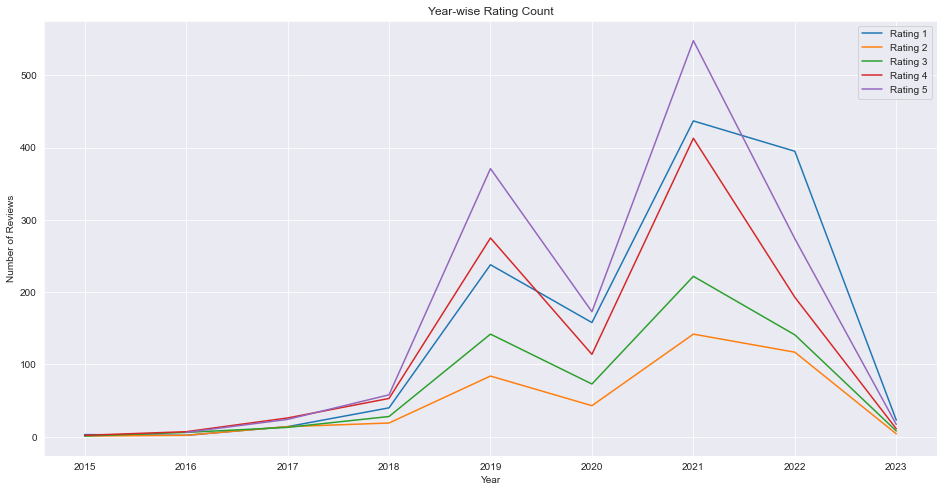

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

# extract year from date column
df1['Year'] = df1['date'].apply(lambda x: str(x).split()[-1])

# group by year and rating, and count the number of reviews
yearly_rating_count = df1.groupby(['Year', 'rating']).size().reset_index(name='count')

# plot the line chart
plt.plot(yearly_rating_count[yearly_rating_count['rating'] == 1]['Year'], yearly_rating_count[yearly_rating_count['rating'] == 1]['count'], label='Rating 1')
plt.plot(yearly_rating_count[yearly_rating_count['rating'] == 2]['Year'], yearly_rating_count[yearly_rating_count['rating'] == 2]['count'], label='Rating 2')
plt.plot(yearly_rating_count[yearly_rating_count['rating'] == 3]['Year'], yearly_rating_count[yearly_rating_count['rating'] == 3]['count'], label='Rating 3')
plt.plot(yearly_rating_count[yearly_rating_count['rating'] == 4]['Year'], yearly_rating_count[yearly_rating_count['rating'] == 4]['count'], label='Rating 4')
plt.plot(yearly_rating_count[yearly_rating_count['rating'] == 5]['Year'], yearly_rating_count[yearly_rating_count['rating'] == 5]['count'], label='Rating 5')
plt.title('Year-wise Rating Count')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

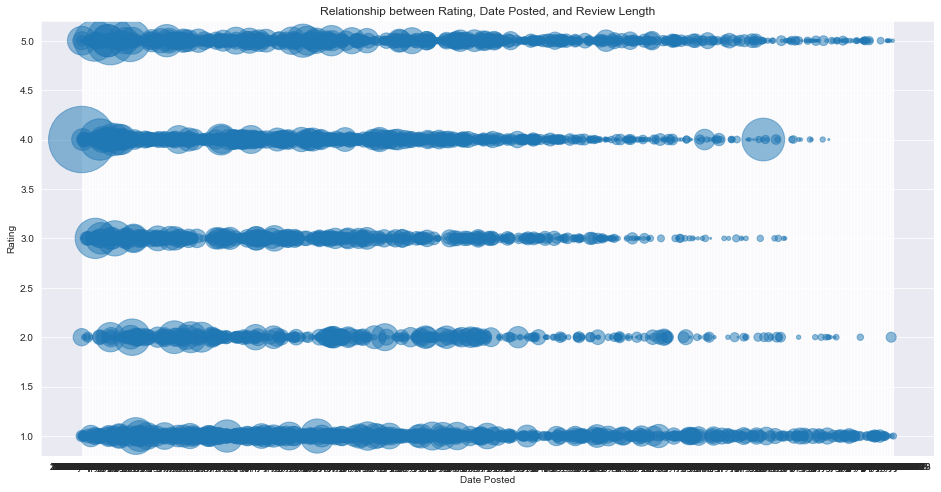

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

# create a scatter plot
plt.scatter(df1['date'], df1['rating'], s=df1['body'].str.len(), alpha=0.5)

# set x-axis label
plt.xlabel('Date Posted')

# set y-axis label
plt.ylabel('Rating')

# set plot title
plt.title('Relationship between Rating, Date Posted, and Review Length')

# display the plot
plt.show()


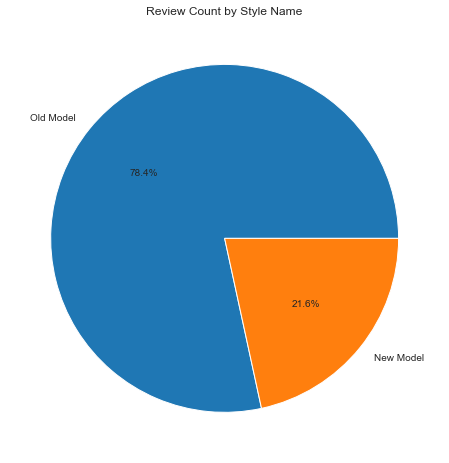

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

# get the count of reviews for new and old models
model_counts = df['model'].value_counts()

# plot the count in a pie chart
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Review Count by Style Name')
plt.show()

For old model we get 78.7% reviews while for new model we get 21.3% reviews.

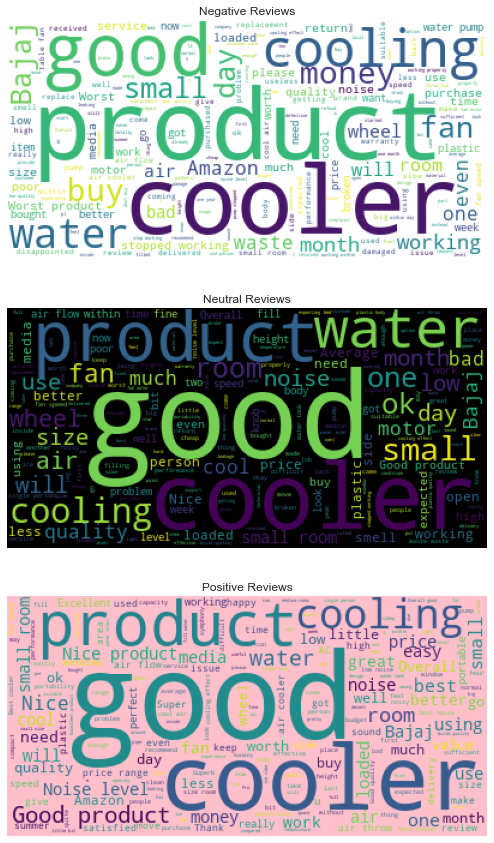

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# filter the reviews by rating
negative_reviews = df[df['rating'] <= 2]['body'].str.cat(sep=' ')
neutral_reviews = df[df['rating'] == 3]['body'].str.cat(sep=' ')
positive_reviews = df[df['rating'] >= 4]['body'].str.cat(sep=' ')

# create word clouds for each rating category
negative_cloud = WordCloud(background_color='white').generate(negative_reviews)
neutral_cloud = WordCloud(background_color='black').generate(neutral_reviews)
positive_cloud = WordCloud(background_color='pink').generate(positive_reviews)

# plot the word clouds
fig, ax = plt.subplots(3, 1, figsize=(30, 15))

ax[0].imshow(negative_cloud)
ax[0].set_title('Negative Reviews')
ax[0].axis('off')

ax[1].imshow(neutral_cloud)
ax[1].set_title('Neutral Reviews')
ax[1].axis('off')

ax[2].imshow(positive_cloud)
ax[2].set_title('Positive Reviews')
ax[2].axis('off')

plt.show()


## Function for finding n nost common words in a series

In [34]:
num_most_common = 25
find_n_most_common = lambda body, n: Counter(' '.join(body).split()).most_common(n)
most_common = data.groupby("rating")["body"].apply(lambda x: find_n_most_common(x, num_most_common))

for rating in range(1,6):
    idx = rating - 1
    print(f"Most Common Words for Rating {rating} sorted by sentiment: ")   
    # Display the most common words in each rating sorted by sentiment 
    print(list(sorted(most_common.iloc[idx], key=lambda x: TextBlob(x[0]).sentiment.polarity)))
    print("\n")

Most Common Words for Rating 1 sorted by sentiment: 
[('is', 764), ('the', 653), ('not', 643), ('and', 480), ('to', 451), ('of', 430), ('product', 385), ('this', 373), ('a', 365), ('I', 350), ('for', 348), ('it', 330), ('in', 270), ('cooler', 261), ('working', 194), ('buy', 193), ('The', 170), ('from', 165), ('with', 165), ('water', 155), ('was', 147), ('fan', 143), ('no', 138), ('after', 138), ('very', 264)]


Most Common Words for Rating 2 sorted by sentiment: 
[('small', 62), ('is', 354), ('the', 282), ('not', 233), ('to', 217), ('for', 182), ('and', 176), ('it', 157), ('a', 154), ('of', 145), ('cooler', 122), ('in', 115), ('this', 112), ('I', 105), ('water', 82), ('The', 73), ('product', 72), ('but', 70), ('Not', 63), ('as', 61), ('be', 59), ('cooling', 58), ('you', 56), ('very', 92), ('good', 76)]


Most Common Words for Rating 3 sorted by sentiment: 
[('small', 102), ('is', 503), ('the', 353), ('for', 250), ('not', 245), ('to', 243), ('and', 219), ('it', 174), ('a', 169), ('of', 